In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import random
import seaborn as sns
import matplotlib.mlab as ml

# Initialization

In [7]:
# Was lui en had geen zin in een if of for
def plot_dens3(x):
  plt.hist(hist, color = ['b', 'r', 'y'], edgecolor = 'black',
          bins = int(180/5))

  # sns.distplot(hist, hist=True, kde=False, 
  #             bins=int(180/5), color = 'blue',
  #             hist_kws={'edgecolor':'black'})

  plt.title('Histogram of density')
  plt.xlabel('Binned values')
  plt.ylabel('Amount')

def plot_dens2(x):
  plt.hist(hist, color = ['b', 'r'], edgecolor = 'black',
          bins = int(180/5))

  # sns.distplot(hist, hist=True, kde=False, 
  #             bins=int(180/5), color = 'blue',
  #             hist_kws={'edgecolor':'black'})

  plt.title('Histogram of X and Y density')
  plt.xlabel('Binned values of X and Y')
  plt.ylabel('Amount')

def plot_dens1(x):
  plt.hist(hist, color = ['b'], edgecolor = 'black',
          bins = int(180/5))

  # sns.distplot(hist, hist=True, kde=False, 
  #             bins=int(180/5), color = 'blue',
  #             hist_kws={'edgecolor':'black'})

  plt.title('Histogram of density')
  plt.xlabel('Binned values')
  plt.ylabel('Amount')

In [8]:
#for pereptron learning
#sigmoid function
def sigmoid(x):
  return 1/(1+np.exp(-x))


alpha = 0.01
xin = []
with open('x.ext') as my_file:
    for line in my_file:
        xin.append(line.split())
del xin[-2:]
# xin.pop()
# xin.pop()
# print(xin)
xin = np.array(xin)
# print(xin)


tin = []
with open('t.ext') as my_file:
    for line in my_file:
      tin.append((line.split()))
          

    
print(tin)
del tin[-1:]
print(tin)
print(xin.shape)

tin = np.array(tin)
tin=tin.astype(float)
xin=xin.astype(float)
print(tin.shape)

# print(np.dot(xin.T,tin))


#p_densPerceptron
def p_dens(w,y):
  E = objectivePerceptron(w,y)
  return np.exp(-E)


def ylearnget(w):
   a=np.dot(xin,w)
   return sigmoid(a)

# gradient and objective for perceptron learning (note )
def gradientPerceptron(w,y):
  a=np.dot(xin,w) # w is the input , x is from x.ext (we compute the probability of the parameters w)
  y=sigmoid(a) #sigmoid function (outpuds)
  e=tin-y # error between given output patterns t (t.ext) and y
  g=-x.T*e #gradient
  gM = alpha*w+g  #learning rule w+= alpha (learning rate) * gradient
  return gM


def objectivePerceptron(w,y): #objective function
  G= - (tin.T * np.log(y)+(1-tin.T)*np.log(1-y)) #y was computed in gradientPerceptron , t from t.ext
  EW= np.dot(w.T,w) / 2 #total of w^2
  M= G + alpha * EW  #value of objective funcition (measure of error)
  return M

[['0'], ['0'], ['0'], ['0'], ['0'], ['1'], ['1'], ['1'], ['1'], ['1'], ['%', '1']]
[['0'], ['0'], ['0'], ['0'], ['0'], ['1'], ['1'], ['1'], ['1'], ['1']]
(10, 3)
(10, 1)


# Bayesian inference for Perceptron learning with MCMC

## Hamilton Monte Carlo

In [9]:
# hamilton monte-carlo method for learning problem
alpha=0.1
epsilon=0.03

def plot_scatter(X):
 # colors = np.random.rand(len(hist))
 # area = (30 * np.random.rand(len(hist)))**2  # 0 to 15 point radii

  x = []
  y = []
  # i[0] = constant scalar
  for i in X:
    x.append(i[1])
    y.append(i[2])

  plt.title('Scatter plot of values W_2 and W_3')
  plt.xlabel('Value of W_2')
  plt.ylabel('Value of W_3')
  plt.scatter(x, y)
  plt.show()

# def plot3D(X):
#   x = []
#   y = []
#   z = []

#   for i in X:
#     x.append(i[0])
#     y.append(i[1])
#     z.append(i[2])


#   fig = plt.figure(figsize=(6, 6))
#   ax = fig.add_subplot(111, projection='3d')
#   ax.scatter(x, y, z,
#             linewidths=1, alpha=.7,
#             edgecolor='k',
#             s = 200,
#             c=z)
#   plt.show()

def sigmoid(x):
  return 1/(1+np.exp(-x))

def gradM(w):
  a=np.dot(xin,w) # w is the input , x is from x.ext (we compute the probability of the parameters w)
  y=sigmoid(a) #sigmoid function (outpuds)
  # print(tin)
  # print(y)
  # raise SystemExit

  e=tin.T[0]-y # error between given output patterns t (t.ext) and y
  g=-np.dot(xin.T,e) #maybe not a dot product #gradient

  #changed this by removing g[0]
  gM = alpha*w+g  #learning rule w+= alpha (learning rate) * gradient
  return gM


def findM(w): #objective function
  a=np.dot(xin,w) #recompute y
  y=sigmoid(a) 
  G= - (np.dot(tin.T , np.log(y))+np.dot((1-tin.T),np.log(1-y))) #y was computed in gradientPerceptron , t from t.ext
  EW= np.dot(w.T,w) / 2 #total of w^2
  M= G + alpha * EW  #value of objective funcition (measure of error)
  return M

# def Energy(x):
#   return 1/2 * np.dot(np.transpose(x),np.dot(A,x))

# def gradientE(x):
#   g=np.array([x[0]*250.25-249.75*x[1],x[1]*250.25-249.75*x[0]])
#   return g

def hamilton_monte_carlo(steps, tau, epsilon, sigmav, plotting = True):
  w = np.random.normal(scale = sigmav,size=3)
  # w = np.random.multivariate_normal([0,0,0], [[sigmav,0,0],[0,sigmav,0],[0,0,sigmav]])
  x_hist2=[]
  x_hist = np.array([])
  x2_hist = np.array([])
  x3_hist = np.array([])
  g = gradM(w) #set gradient from initial w
  M = findM(w) #set objective from initial w
  rejections=0

  for l in range(steps):
    p = np.random.normal(0, 1, len(w))
    # p = np.random.multivariate_normal([0,0,0], [[1,0,0],[0,1,0],[0,0,1]])
    # print(p)
    # print(p2)
    # raise SystemExit
    H = np.dot(np.transpose(p), p) / 2 + M
    wnew = w
    gnew = g

    for s in range(tau):
      p = p - epsilon * g /2
      wnew = w + epsilon * p #!!!!!!!!!!!!!! += caused the error DO NOT USE
      gnew = gradM(wnew)
      p = p - epsilon * gnew /2
    
    Mnew = findM(wnew)
    Hnew = np.dot(np.transpose(p), p) /2 + Mnew
    dH = Hnew - H

    # print(dH)
    # print(np.prod(dH))

    accept = False
    dH= -dH #!!! flipping this value seems needed?
    if dH < 0:   
      accept = True
    elif np.random.uniform(0,1) < np.exp(-dH): #!!! minus sign was missing
      accept = True



    if accept:
      g = gnew
      w = [1,wnew[1], wnew[2]]
      # w = wnew
      M = Mnew
    else:
      rejections+=1
    x_hist2.append(w)

    x_hist = np.append(x_hist, w[0])
    x2_hist = np.append(x2_hist, w[1])
    x3_hist = np.append(x3_hist, w[2])
  # plot_scatter(np.array(np.split(x_hist, steps)))

  #plotting
  if plotting:
    # data=x_hist
    # print(data.shape)
    # x_coordinate = [ 25 * i for i in range(len(data)) ]
    # plt.plot(x_coordinate,data)
    # plt.show()
    # data=x2_hist
    # print(data.shape)
    # x_coordinate = [ 25 * i for i in range(len(data)) ]
    # plt.plot(x_coordinate,data)
    # plt.show()
    # data=x3_hist
    # print(data.shape)
    # x_coordinate = [ 25 * i for i in range(len(data)) ]
    # plt.plot(x_coordinate,data)
    # plt.show()
    data=x_hist2
    x_coordinate = [ 25 * i for i in range(len(data)) ]
    plt.plot(x_coordinate,data)
    plt.xlabel('Iterations')
    plt.ylabel('Weight value')
    plt.legend(['W1', 'W2', 'W3'])
    plt.show()
    
    plot_scatter(x_hist2)
    # plot3D(x_hist2)
  # print(w)
  return rejections, np.array(np.split(x_hist2, steps))

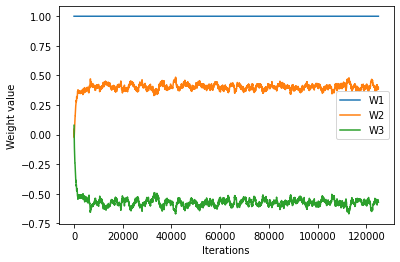

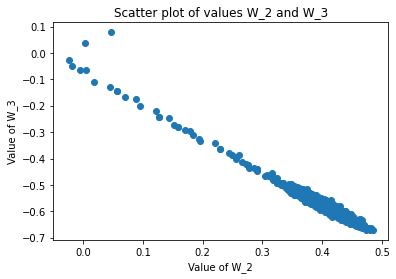

AttributeError: ignored

In [10]:
rejections, hist = hamilton_monte_carlo(5000,100,0.01,0.1)
print(rejections)
# print(hist)
# plot_dens1(hist[1])
# plot_dens1(hist[2])

## Metropalis Hasting

In [11]:
#changed version for perceptron learning!!!!!!!!!!!
def plot_scatter(X):
 # colors = np.random.rand(len(hist))
 # area = (30 * np.random.rand(len(hist)))**2  # 0 to 15 point radii

  x = []
  y = []

  for i in X:
    x.append(i[1])
    y.append(i[2])

  plt.scatter(x, y)
  plt.title('Scatter plot of values W_2 and W_3')
  plt.xlabel('Value of W_2')
  plt.ylabel('Value of W_3')
  plt.show()

def accept(a):
  if np.isnan(a):
    return 0
  return np.random.binomial(1, min(a,1))

def metropalis_hasting(steps, sigma):
  rejections = 0
  x_hist = []
  init_x = np.random.normal(0,sigma,3)
  x = init_x
  for i in range(steps):
    x_new = np.random.normal(x,0.1,3)
    ylearn = ylearnget(x_new) #added for perceptron
    a = p_dens(x_new,ylearn)/p_dens(x,ylearn) 
    accep=False
    for i in range(len(a[0])): 
        if accept(a[0][i]) < 0: 
          accep=accep
        else:
          accep = True
    if accep:
      # x = x_new
      x = np.array([1,x_new[1], x_new[2]])
    else:
      rejections+=1
    x_hist.append(x)

  data=x_hist
  x_coordinate = [ i for i in range(len(data)) ]
  plt.plot(x_coordinate,data)
  plt.xlabel('Iterations')
  plt.ylabel('Weight value')
  plt.legend(['W1', 'W2', 'W3'])
  plt.show()
  plot_scatter(x_hist)
  return (rejections, np.array(x_hist))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in multiply


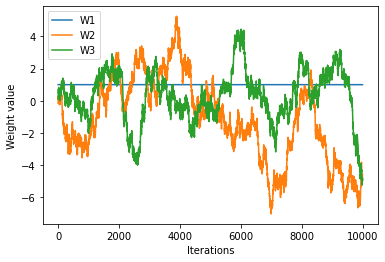

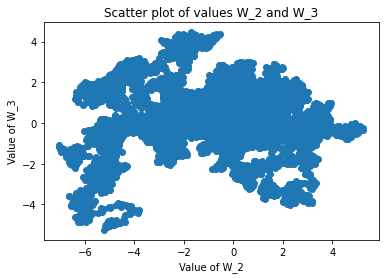

0


In [12]:
rejections, hist = metropalis_hasting(10000, 0.1)
print(rejections)
# print(hist)
# plot_dens3(hist)

# Experiments (Not needed anymore)

In [13]:
#not needed anymore
steps = [1000]
sigma = [0.1, 0.5, 1]
epsilon = [0.01, 0.05, 0.1, 0.5]
tau = [10, 50, 100]

dictHMC = list({} for i in range(len(steps)* len(sigma) * len(epsilon) * len(tau)))
HMC_counter = 0
for step in steps:
  for frogStep in tau:
    for e in epsilon:
      for s in sigma:
        rejections, hist = hamilton_monte_carlo(step, frogStep, e, s, False)
        dictHMC[HMC_counter]["rejections"] = rejections
        dictHMC[HMC_counter]["step"] = step
        dictHMC[HMC_counter]["sigma"] = s
        dictHMC[HMC_counter]["epsilon"] = e
        dictHMC[HMC_counter]["tau"] = frogStep
        dictHMC[HMC_counter]["hist"] = hist
        dictHMC[HMC_counter]["ratio"] = rejections/step

        HMC_counter += 1

AttributeError: ignored

In [ ]:
minHMC = min(dictHMC, key=lambda x:x['ratio'])
maxHMC = max(dictHMC, key=lambda x:x['ratio'])
# print(minHMC)
# print(maxHMC)
for i in dictHMC:  
  print("Rejections: {}, epsilon: {}, sigma: {}, tau: {}".format(i['rejections'],i['epsilon'],i['sigma'],i['tau']))

# For latex table
# for i in dictHMC:  
#   print(repr("{} & {} & {} & {} \\\hline".format(i['sigma'],i['epsilon'],i['tau'],i['rejections'])))

In [ ]:
rejections_ep = np.array([])
epsilon_test = np.linspace(0.01, 10, num=50)
for e in epsilon_test:
  rejections, hist = hamilton_monte_carlo(100, 50, e, 0.1, False)
  rejections_ep = np.append(rejections_ep, rejections)

AttributeError: ignored

In [ ]:
rejections_sigma = np.array([])
sigma_test = np.linspace(0.1, 100, num=50)
for e in sigma_test:
  rejections, hist = hamilton_monte_carlo(100, 10, 0.01, e, False)
  rejections_sigma = np.append(rejections_sigma, rejections)

AttributeError: ignored

In [ ]:
rejections_tau = np.array([])
tau_test = np.linspace(0, 10000, num=10)
for e in tau_test:
  rejections, hist = hamilton_monte_carlo(1000, int(e), 0.01, 0.1, False)
  rejections_tau = np.append(rejections_tau, rejections)

AttributeError: ignored

ValueError: ignored

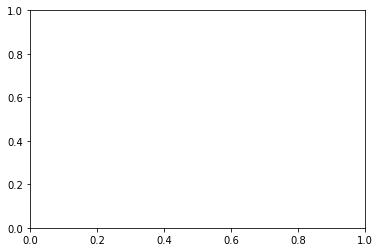

In [ ]:
plt.plot(epsilon_test, rejections_ep)
plt.xlabel('Value of epsilon')
plt.ylabel('Amount of Rejection')
plt.show()

plt.plot(sigma_test, rejections_sigma)
plt.xlabel('Value of sigma')
plt.ylabel('Amount of Rejection')
plt.show()

# plt.plot(tau_test, rejections_tau)
# plt.xlabel('Value of tau')
# plt.ylabel('Amount of Rejection')
# plt.show()